In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadstat


In [2]:
import seaborn as sns

In [3]:
ls

 磁碟區 C 中的磁碟是 Acer
 磁碟區序號:  2EF6-96C7

 C:\Users\Michael\Desktop\python\家社期末 的目錄

2019/12/12  下午 04:55    <DIR>          .
2019/12/12  下午 04:55    <DIR>          ..
2019/12/04  下午 07:53    <DIR>          .ipynb_checkpoints
2017/10/06  下午 04:59         5,244,246 tscs2016q1.sav
2019/12/12  下午 04:55           155,524 家社期末考.ipynb
               2 個檔案       5,399,770 位元組
               3 個目錄  177,436,545,024 位元組可用


In [4]:
df, meta = pyreadstat.read_sav('tscs2016q1.sav')
df.head(5)

,id,zip,stratum2,region,stratum2014,region2014,r_stratum2014,psu,ssu,wsel0,...,k7e,k8,kk8,k9,k10,k11a,k11b,k11c,edt1,edt2
0,103301.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,1.0,,5.0,11.0,3.0,3.0,3.0,20160913.0,2121.0
1,103303.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,66.0,1.0,,98.0,98.0,4.0,4.0,4.0,20160922.0,1907.0
2,103304.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99996.0,NaN,,6.0,97.0,4.0,3.0,4.0,20160827.0,1454.0
3,103316.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,9.0,,11.0,97.0,3.0,4.0,3.0,20160903.0,2144.0
4,103320.0,103.0,1.0,1.0,1.0,1.0,11.0,1.0,1.0,0.822111,...,99997.0,1.0,,4.0,8.0,3.0,4.0,1.0,20160904.0,1917.0


In [5]:
no_single=df[df['a5'].isin([1,2,5])]

In [6]:
#df['d1a']

In [7]:
score={1.0:5,2.0:4,3.0:3,4.0:2,5:1,97:97,98:98}

In [8]:
df['性別意識加權']=df['d1a'].map(score)+df['d1b'].map(score)+df['d1e'].map(score)

In [9]:
no_single=df[df['a5'].isin([1,2,5])]

In [10]:
no_single=no_single[no_single['d4a'].notna()&no_single['d4a'].isin([1,2,3,4,5,6,7])]
no_single=no_single[no_single['d5a'].notna()&no_single['d5a'].isin([1,2,3,4,5,6,7])]
no_single=no_single[no_single['k5c']<995]
no_single=no_single[no_single['k7c']<995]
no_single=no_single[no_single['d2a'].notna()&no_single['d2a'].isin([1,2,3,4,5,8])]
no_single[no_single['d2a']==8]=3
score2={1:10,2:7,3:4,4:2,5:1,6:1,7:1}
no_single['d4a']=no_single['d4a'].map(score2)
no_single['d4b']=no_single['d4b'].map(score2)
no_single['d4c']=no_single['d4c'].map(score2)
no_single['d5a']=no_single['d5a'].map(score2)
no_single['d5b']=no_single['d5b'].map(score2)
no_single['d5c']=no_single['d5c'].map(score2)

In [11]:
#no_single['性別意識加權']
#no_single=no_single[no_single['d2a'].notna()&no_single['d2a'].isin([1,2,3,4,5,8])]
#no_single[no_single['d2a']==8]=3

In [12]:
len(no_single['性別意識加權'])

855

In [13]:
con=pd.value_counts(no_single['性別意識加權'])

In [14]:
con.index[con.index<16]

Int64Index([10, 8, 6, 12, 9, 11, 7, 3, 5, 4, 13, 14, 15], dtype='int64')

In [15]:
con2=con[sorted(con.index[con.index<16])]

In [16]:
con2=pd.DataFrame(con2)

In [17]:
con2['性別意識加權(%)']=con2['性別意識加權']/sum(con2['性別意識加權'])*100

In [18]:
K=con2['性別意識加權(%)'].array[0]
K1=con2['性別意識加權(%)'].array[0]
for i in range(len(con2)-1):
    K+=con2['性別意識加權(%)'].array[i+1]
    K1=np.append(K1,K)
con2['性別意識加權累積(%)']=K1

In [19]:
con2

,性別意識加權,性別意識加權(%),性別意識加權累積(%)
3,43,5.082742,5.082742
4,22,2.600473,7.683215
5,26,3.073286,10.756501
6,102,12.056738,22.813239
7,57,6.737589,29.550827
8,154,18.203310,47.754137
9,70,8.274232,56.028369
10,179,21.158392,77.186761
11,64,7.565012,84.751773
12,94,11.111111,95.862884


In [20]:
#no_single

In [21]:
boy=no_single[no_single["a1"]==1]
girl=no_single[no_single["a1"]==2]

In [22]:
n1=np.arange(3,7,1)
n2=np.arange(7,12,1)
n3=np.arange(12,16,1)

In [23]:
equal=no_single[no_single['性別意識加權'].isin(n1)]
transitional=no_single[no_single['性別意識加權'].isin(n2)]
tranditional=no_single[no_single['性別意識加權'].isin(n3)]
equal_boy=boy[boy['性別意識加權'].isin(n1)]
equal_girl=girl[girl['性別意識加權'].isin(n1)]
transitional_boy=boy[boy['性別意識加權'].isin(n2)]
transitional_girl=girl[girl['性別意識加權'].isin(n2)]
tranditional_boy=boy[boy['性別意識加權'].isin(n3)]
tranditional_girl=girl[girl['性別意識加權'].isin(n3)]

In [24]:
len(tranditional)

129

# 分析: 子女教育 (右尾為配偶做比較多)

In [25]:
equal_edu=equal['d2a']
equal_boy_edu=equal_boy['d2a']
equal_girl_edu=equal_girl['d2a']
transitional_edu=transitional['d2a']
transitional_boy_edu=transitional_boy['d2a']
transitional_girl_edu=transitional_girl['d2a']
tranditional_edu=tranditional['d2a']
tranditional_boy_edu=tranditional_boy['d2a']
tranditional_girl_edu=tranditional_girl['d2a']

equal_edu=equal_edu[equal_edu.notna()&equal_edu.isin([1,2,3,4,5,8])]
transitional_edu=transitional_edu[transitional_edu.notna()&transitional_edu.isin([1,2,3,4,5,8])]
tranditional_edu=tranditional_edu[tranditional_edu.notna()&tranditional_edu.isin([1,2,3,4,5,8])]

equal_edu[equal_edu==8]=3
transitional_edu[transitional_edu==8]=3
tranditional_edu[tranditional_edu==8]=3

In [26]:
from scipy.stats import t

In [27]:
import scipy as sp
import statsmodels.api as sm
import researchpy as rp
from statsmodels.formula.api import ols
import statsmodels.stats

# 三種類型 anova

In [28]:
k=np.append(equal_edu,transitional_edu)
dic1={"分數":np.append(k,tranditional_edu),"類型":["平等"]*len(equal_edu)+["過度"]*len(transitional_edu)+["傳統"]*len(tranditional_edu)}
edu=pd.DataFrame(dic1)

In [29]:
results = ols('分數 ~ C(類型)', data=edu).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5677
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.567
Time:                        16:56:27   Log-Likelihood:                -1180.7
No. Observations:                 846   AIC:                             2367.
Df Residuals:                     843   BIC:                             2382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7209      0.086     31.577      0.000       2.552       2.890
C(類型)[T.平等]     0.1184      0.111      1.064      0.288      -0.100       0.337
C(類型)[T.過度]     0.0672      0.096      0.699      0.485      -0.122       0.256
==============================================================================
Omnibus:                        4.853   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                6.002
Skew:                          -0.019   Prob(JB):                       0.0497
Kurtosis:                       3.411   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
C(類型)       1.087608    2.0  0.567739  0.567022
Residual  807.460855  843.0       NaN       NaN


# 平等型

In [32]:
sp.stats.ttest_ind(equal_edu,np.array([3]*len(equal_edu)))#平等

Ttest_indResult(statistic=-2.6129884621587576, pvalue=0.009327992221013189)

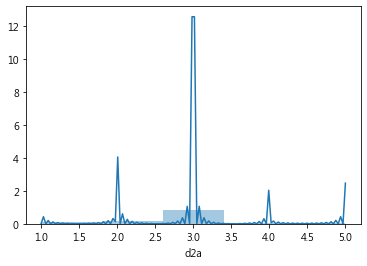

In [33]:
sns.distplot(equal_edu,bins=5)

### 平等男

In [34]:
sp.stats.ttest_ind(equal_boy_edu,np.array([3]*len(equal_boy_edu)))

Ttest_indResult(statistic=0.9799176335735933, pvalue=0.3288415589991438)

### 平等女

In [35]:
sp.stats.ttest_ind(equal_girl_edu,np.array([3]*len(equal_girl_edu)))

Ttest_indResult(statistic=-4.315491455083536, pvalue=2.7451133502482413e-05)

# 過渡型

In [36]:
sp.stats.ttest_ind(transitional_edu,np.array([3]*len(transitional_edu)))#過渡

Ttest_indResult(statistic=-4.8468031112464, pvalue=1.4444838539101037e-06)

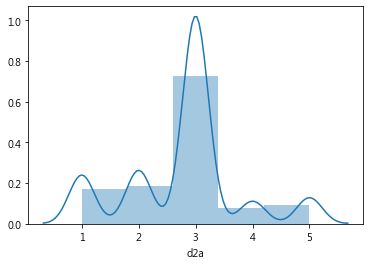

In [37]:
sns.distplot(transitional_edu,bins=5)

### 過渡男

In [38]:
sp.stats.ttest_ind(transitional_boy_edu,np.array([3]*len(transitional_boy_edu)))

Ttest_indResult(statistic=0.3255659618242708, pvalue=0.7448928878943215)

### 過渡女

In [39]:
sp.stats.ttest_ind(transitional_girl_edu,np.array([3]*len(transitional_girl_edu)))

Ttest_indResult(statistic=-7.127317708515649, pvalue=3.179685076519949e-12)

# 傳統型

In [40]:
sp.stats.ttest_ind(tranditional_edu,np.array([3]*len(tranditional_edu)))#傳統

Ttest_indResult(statistic=-2.988832202073015, pvalue=0.0030728389011037693)

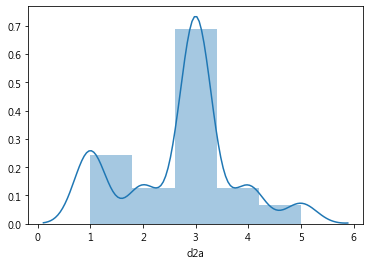

In [41]:
sns.distplot(tranditional_edu,bins=5)

### 傳統男

In [42]:
sp.stats.ttest_ind(tranditional_boy_edu,np.array([3]*len(tranditional_boy_edu)))

Ttest_indResult(statistic=-0.23727677529946908, pvalue=0.8128274442179695)

### 傳統女

In [43]:
sp.stats.ttest_ind(tranditional_girl_edu,np.array([3]*len(tranditional_girl_edu)))

Ttest_indResult(statistic=-4.146033173777908, pvalue=6.113769852954242e-05)

# 準備晚餐 (右尾為自己做比較多)

In [44]:
equal_dinner1=equal['d4a']
equal_boy_dinner1=equal_boy['d4a']
equal_girl_dinner1=equal_girl['d4a']
transitional_dinner1=transitional['d4a']
transitional_boy_dinner1=transitional_boy['d4a']
transitional_girl_dinner1=transitional_girl['d4a']
tranditional_dinner1=tranditional['d4a']
tranditional_boy_dinner1=tranditional_boy['d4a']
tranditional_girl_dinner1=tranditional_girl['d4a']

In [45]:
equal_dinner2=equal['d5a']
equal_boy_dinner2=equal_boy['d5a']
equal_girl_dinner2=equal_girl['d5a']
transitional_dinner2=transitional['d5a']
transitional_boy_dinner2=transitional_boy['d5a']
transitional_girl_dinner2=transitional_girl['d5a']
tranditional_dinner2=tranditional['d5a']
tranditional_boy_dinner2=tranditional_boy['d5a']
tranditional_girl_dinner2=tranditional_girl['d5a']

# Anova

In [46]:
K=np.append(equal_dinner1/equal_dinner2,transitional_dinner1/transitional_dinner2)
dic={'分數':np.append(K,tranditional_dinner1/tranditional_dinner2),'類型':["平等"]*len(equal_dinner1)+["過度"]*len(transitional_dinner1)+["傳統"]*len(tranditional_dinner1)}
dinner=pd.DataFrame(dic)

In [47]:
results = ols('分數 ~ C(類型)', data=dinner).fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.874
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00786
Time:                        16:56:30   Log-Likelihood:                -2312.4
No. Observations:                 846   AIC:                             4631.
Df Residuals:                     843   BIC:                             4645.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5058      0.328     10.678      0.000       2.861       4.150
C(類型)[T.平等]    -1.0543      0.424     -2.486      0.013      -1.887      -0.222
C(類型)[T.過度]    -0.1331      0.367     -0.363      0.717      -0.852       0.586
==============================================================================
Omnibus:                      146.351   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.134
Skew:                           0.961   Prob(JB):                     4.13e-33
Kurtosis:                       2.266   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
C(類型)       135.559052    2.0  4.874334  0.007857
Residual  11722.244568  843.0       NaN       NaN


# 平等型

#### f test 

In [50]:
from scipy.stats import f

In [51]:
F = np.var(equal_dinner1) / np.var(equal_dinner2)
df1 = len(equal_dinner1) - 1
df2 = len(equal_dinner1) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5934179361501707


#### t.test

In [52]:
sp.stats.ttest_ind(equal_dinner1,equal_dinner2,equal_var=True)

Ttest_indResult(statistic=1.3795455598803035, pvalue=0.168529416948842)

### 平等男

#### f test

In [53]:
F = np.var(equal_boy_dinner1) / np.var(equal_boy_dinner2)
df1 = len(equal_boy_dinner1) - 1
df2 = len(equal_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8453287070590475


#### t.test

In [54]:
sp.stats.ttest_ind(equal_boy_dinner1,equal_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-4.085739601233438, pvalue=7.415167098257013e-05)

### 平等女

#### f test

In [55]:
F = np.var(equal_girl_dinner1) / np.var(equal_girl_dinner2)
df1 = len(equal_girl_dinner1) - 1
df2 = len(equal_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.6697865375836647


#### t.test

In [56]:
sp.stats.ttest_ind(equal_girl_dinner1,equal_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=5.902622079269386, pvalue=1.9963142717572204e-08)

# 過渡型

#### f test

In [57]:
F = np.var(transitional_dinner1) / np.var(transitional_dinner2)
df1 = len(transitional_dinner1) - 1
df2 = len(transitional_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9628743522678949


#### t test

In [58]:
sp.stats.ttest_ind(transitional_dinner1,transitional_dinner2,equal_var=True)

Ttest_indResult(statistic=3.8592466999574393, pvalue=0.00012070199875857241)

### 過渡型男

#### f test

In [59]:
F = np.var(transitional_boy_dinner1) / np.var(transitional_boy_dinner2)
df1 = len(transitional_boy_dinner1) - 1
df2 = len(transitional_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9826563404406912


#### t test

In [60]:
sp.stats.ttest_ind(transitional_boy_dinner1,transitional_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-11.32045219077582, pvalue=1.5733600501814185e-26)

### 過渡型女

#### f test

In [61]:
F = np.var(transitional_girl_dinner1) / np.var(transitional_girl_dinner2)
df1 = len(transitional_girl_dinner1) - 1
df2 = len(transitional_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.00951375008046118


#### t test

In [62]:
sp.stats.ttest_ind(transitional_girl_dinner1,transitional_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=17.439371567705123, pvalue=1.0944068007837945e-54)

# 傳統型

#### f test

In [63]:
F = np.var(tranditional_dinner1) / np.var(tranditional_dinner2)
df1 = len(tranditional_dinner1) - 1
df2 = len(tranditional_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8674589316300678


#### t test

In [64]:
sp.stats.ttest_ind(tranditional_dinner1,tranditional_dinner2,equal_var=True)

Ttest_indResult(statistic=1.3884231631201662, pvalue=0.1662151441540132)

### 傳統型男

#### f test

In [65]:
F = np.var(tranditional_boy_dinner1) / np.var(tranditional_boy_dinner2)
df1 = len(tranditional_boy_dinner1) - 1
df2 = len(tranditional_boy_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.28673836245021933


#### t test

In [66]:
sp.stats.ttest_ind(tranditional_boy_dinner1,tranditional_boy_dinner2,equal_var=True)

Ttest_indResult(statistic=-6.499511769360162, pvalue=1.7005579105563294e-09)

### 傳統型女

#### f test

In [67]:
F = np.var(tranditional_girl_dinner1) / np.var(tranditional_girl_dinner2)
df1 = len(tranditional_girl_dinner1) - 1
df2 = len(tranditional_girl_dinner2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.4864947650657414


#### t test

In [68]:
sp.stats.ttest_ind(tranditional_girl_dinner1,tranditional_girl_dinner2,equal_var=True)

Ttest_indResult(statistic=9.753366999768225, pvalue=3.8210242117737205e-17)

# 洗衣服((右尾為自己做比較多)

In [69]:
equal_laundry1=equal['d4b']
equal_boy_laundry1=equal_boy['d4b']
equal_girl_laundry1=equal_girl['d4b']
transitional_laundry1=transitional['d4b']
transitional_boy_laundry1=transitional_boy['d4b']
transitional_girl_laundry1=transitional_girl['d4b']
tranditional_laundry1=tranditional['d4b']
tranditional_boy_laundry1=tranditional_boy['d4b']
tranditional_girl_laundry1=tranditional_girl['d4b']

In [70]:
equal_laundry2=equal['d5b']
equal_boy_laundry2=equal_boy['d5b']
equal_girl_laundry2=equal_girl['d5b']
transitional_laundry2=transitional['d5b']
transitional_boy_laundry2=transitional_boy['d5b']
transitional_girl_laundry2=transitional_girl['d5b']
tranditional_laundry2=tranditional['d5b']
tranditional_boy_laundry2=tranditional_boy['d5b']
tranditional_girl_laundry2=tranditional_girl['d5b']

# Anova

In [71]:
K=np.append(equal_laundry1/equal_laundry2,transitional_laundry1/transitional_laundry2)
dic={'分數':np.append(K,tranditional_laundry1/tranditional_laundry2),'類型':["平等"]*len(equal_laundry1)+["過度"]*len(transitional_laundry1)+["傳統"]*len(tranditional_laundry1)}
laundry=pd.DataFrame(dic)

In [72]:
results = ols('分數 ~ C(類型)', data=laundry).fit()

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.206
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00566
Time:                        16:56:33   Log-Likelihood:                -2338.0
No. Observations:                 846   AIC:                             4682.
Df Residuals:                     843   BIC:                             4696.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8798      0.338     11.465      0.000       3.216       4.544
C(類型)[T.平等]    -1.3286      0.437     -3.040      0.002      -2.187      -0.471
C(類型)[T.過度]    -0.5015      0.378     -1.328      0.185      -1.243       0.240
==============================================================================
Omnibus:                      180.926   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.642
Skew:                           0.908   Prob(JB):                     1.06e-31
Kurtosis:                       2.134   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
C(類型)       153.821289    2.0  5.206171  0.00566
Residual  12453.618526  843.0       NaN      NaN


# 平等型

#### f.test

In [75]:
F = np.var(equal_laundry1) / np.var(equal_laundry2)
df1 = len(equal_laundry1) - 1
df2 = len(equal_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.8331782195692623


#### t.test

In [76]:
sp.stats.ttest_ind(equal_laundry1,equal_laundry2,equal_var=True)

Ttest_indResult(statistic=2.216836200128498, pvalue=0.02721949367421113)

### 平等型男

#### t.test

In [77]:
F = np.var(equal_boy_laundry1) / np.var(equal_boy_laundry2)
df1 = len(equal_boy_laundry1) - 1
df2 = len(equal_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.3573716997848462


#### f.test

In [78]:
sp.stats.ttest_ind(equal_boy_laundry1,equal_boy_laundry2,equal_var=True)

Ttest_indResult(statistic=-4.019742091516106, pvalue=9.540626726586618e-05)

### 平等型女

#### f.test

In [79]:
F = np.var(equal_girl_laundry1) / np.var(equal_girl_laundry2)
df1 = len(equal_girl_laundry1) - 1
df2 = len(equal_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.054677839572157105


#### t.test

In [80]:
sp.stats.ttest_ind(equal_girl_laundry1,equal_girl_laundry2,equal_var=True)

Ttest_indResult(statistic=7.431857049454187, pvalue=5.607250536296031e-12)

# 過渡型

#### f.test

In [81]:
F = np.var(transitional_laundry1) / np.var(transitional_laundry2)
df1 = len(transitional_laundry1) - 1
df2 = len(transitional_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9350311911494613


#### t.test

In [82]:
sp.stats.ttest_ind(transitional_laundry1,transitional_laundry2,equal_var=True)

Ttest_indResult(statistic=3.2749090856465854, pvalue=0.001091627522535117)

#### 過渡型男 

#### f.test

In [83]:
F = np.var(transitional_boy_laundry1) / np.var(transitional_boy_laundry2)
df1 = len(transitional_boy_laundry1) - 1
df2 = len(transitional_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.008707250702479241


#### t.test

In [84]:
sp.stats.ttest_ind(transitional_boy_laundry1,transitional_boy_laundry2,equal_var=False)

Ttest_indResult(statistic=-14.298953619355155, pvalue=8.430809213383595e-39)

#### 過渡型女

#### f.test

In [85]:
F = np.var(transitional_girl_laundry1) / np.var(transitional_girl_laundry2)
df1 = len(transitional_girl_laundry1) - 1
df2 = len(transitional_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.014710961427748859


#### t.test (變異數我當不等於)

In [86]:
sp.stats.ttest_ind(transitional_girl_laundry1,transitional_girl_laundry2,equal_var=False)

Ttest_indResult(statistic=19.857492652536376, pvalue=1.8111188818903685e-66)

# 傳統型

#### f.test

In [87]:
F = np.var(tranditional_laundry1) / np.var(tranditional_laundry2)
df1 = len(tranditional_laundry1) - 1
df2 = len(tranditional_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9796836537441271


#### t.test

In [88]:
sp.stats.ttest_ind(tranditional_laundry1,tranditional_laundry2,equal_var=True)

Ttest_indResult(statistic=1.529267920259381, pvalue=0.12743271063967315)

### 傳統型男

#### f.test

In [89]:
F = np.var(tranditional_boy_laundry1) / np.var(tranditional_boy_laundry2)
df1 = len(tranditional_boy_laundry1) - 1
df2 = len(tranditional_boy_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.13625113332608185


#### t.test

In [90]:
sp.stats.ttest_ind(tranditional_boy_laundry1,tranditional_boy_laundry2,equal_var=True)

Ttest_indResult(statistic=-6.8834040700867085, pvalue=2.455828252914242e-10)

### 傳統型女

#### f.test

In [91]:
F = np.var(tranditional_girl_laundry1) / np.var(tranditional_girl_laundry2)
df1 = len(tranditional_girl_laundry1) - 1
df2 = len(tranditional_girl_laundry2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5779398651598284


#### t.test

In [92]:
sp.stats.ttest_ind(tranditional_boy_laundry1,tranditional_boy_laundry2,equal_var=True)

Ttest_indResult(statistic=-6.8834040700867085, pvalue=2.455828252914242e-10)

# 打掃家裡

In [93]:
equal_clean1=equal['d4c']
equal_boy_clean1=equal_boy['d4c']
equal_girl_clean1=equal_girl['d4c']
transitional_clean1=transitional['d4c']
transitional_boy_clean1=transitional_boy['d4c']
transitional_girl_clean1=transitional_girl['d4c']
tranditional_clean1=tranditional['d4c']
tranditional_boy_clean1=tranditional_boy['d4c']
tranditional_girl_clean1=tranditional_girl['d4c']

In [94]:
equal_clean2=equal['d5c']
equal_boy_clean2=equal_boy['d5c']
equal_girl_clean2=equal_girl['d5c']
transitional_clean2=transitional['d5c']
transitional_boy_clean2=transitional_boy['d5c']
transitional_girl_clean2=transitional_girl['d5c']
tranditional_clean2=tranditional['d5c']
tranditional_boy_clean2=tranditional_boy['d5c']
tranditional_girl_clean2=tranditional_girl['d5c']

# Anova

In [95]:
K=np.append(equal_clean1/equal_clean2,transitional_clean1/transitional_clean2)
dic={'分數':np.append(K,tranditional_clean1/tranditional_clean2),'類型':["平等"]*len(equal_clean1)+["過度"]*len(transitional_clean1)+["傳統"]*len(tranditional_clean1)}
clean=pd.DataFrame(dic)

In [96]:
results = ols('分數 ~ C(類型)', data=clean).fit()

In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.110
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00232
Time:                        16:56:36   Log-Likelihood:                -2193.0
No. Observations:                 846   AIC:                             4392.
Df Residuals:                     843   BIC:                             4406.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0949      0.285     10.855      0.000       2.535       3.654
C(類型)[T.平等]    -1.0539      0.368     -2.862      0.004      -1.777      -0.331
C(類型)[T.過度]    -0.1714      0.318     -0.538      0.590      -0.796       0.453
==============================================================================
Omnibus:                      138.522   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.562
Skew:                           1.226   Prob(JB):                     6.96e-47
Kurtosis:                       3.122   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

               sum_sq     df         F   PR(>F)
C(類型)      128.145479    2.0  6.109866  0.00232
Residual  8840.344359  843.0       NaN      NaN


# 平等型

#### f.test

In [99]:
F = np.var(equal_clean1) / np.var(equal_clean2)
df1 = len(equal_clean1) - 1
df2 = len(equal_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7524340634288245


#### t.test

In [100]:
sp.stats.ttest_ind(equal_clean1,equal_clean2,equal_var=True)

Ttest_indResult(statistic=2.654782377218217, pvalue=0.008266091416120263)

### 平等型男

#### f.test

In [101]:
F = np.var(equal_boy_clean1) / np.var(equal_boy_clean2)
df1 = len(equal_boy_clean1) - 1
df2 = len(equal_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.7337620405964898


#### t.test

In [102]:
sp.stats.ttest_ind(equal_boy_clean1,equal_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-2.737376606817151, pvalue=0.007009248286998886)

### 平等型女

#### f.test

In [103]:
F = np.var(equal_girl_clean1) / np.var(equal_girl_clean2)
df1 = len(equal_girl_clean1) - 1
df2 = len(equal_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.2626249206491251


#### t.test

In [104]:
sp.stats.ttest_ind(equal_girl_clean1,equal_girl_clean2,equal_var=True)

Ttest_indResult(statistic=7.118667359136912, pvalue=3.2381661959651996e-11)

# 過度型

#### f.test

In [105]:
F = np.var(transitional_clean1) / np.var(transitional_clean2)
df1 = len(transitional_clean1) - 1
df2 = len(transitional_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.6632729123096573


#### t.test

In [106]:
sp.stats.ttest_ind(transitional_clean1,transitional_clean2,equal_var=True)

Ttest_indResult(statistic=3.386147736525889, pvalue=0.0007351674877346611)

### 過渡型男

#### f.test

In [107]:
F = np.var(transitional_boy_clean1) / np.var(transitional_boy_clean2)
df1 = len(transitional_boy_clean1) - 1
df2 = len(transitional_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.6211157658777084


#### t.test

In [108]:
sp.stats.ttest_ind(transitional_boy_clean1,transitional_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-11.435716474720584, pvalue=5.541885641047131e-27)

### 過渡型女

#### f.test

In [109]:
F = np.var(transitional_girl_clean1) / np.var(transitional_girl_clean2)
df1 = len(transitional_girl_clean1) - 1
df2 = len(transitional_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.03673521842458305


#### t.test (我當不等於)

In [110]:
sp.stats.ttest_ind(transitional_girl_clean1,transitional_girl_clean2,equal_var=False)

Ttest_indResult(statistic=16.83247920828678, pvalue=1.4059365480094e-51)

# 傳統型

#### f.test

In [111]:
F = np.var(tranditional_clean1) / np.var(tranditional_clean2)
df1 = len(tranditional_clean1) - 1
df2 = len(tranditional_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.44911576022482325


#### t.test

In [112]:
sp.stats.ttest_ind(tranditional_clean1,tranditional_clean2,equal_var=True)

Ttest_indResult(statistic=1.2445612235688948, pvalue=0.21443126758236772)

### 傳統型男

#### f.test

In [113]:
F = np.var(tranditional_boy_clean1) / np.var(tranditional_boy_clean2)
df1 = len(tranditional_boy_clean1) - 1
df2 = len(tranditional_boy_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.9581022970204782


#### t.test

In [114]:
sp.stats.ttest_ind(tranditional_boy_clean1,tranditional_boy_clean2,equal_var=True)

Ttest_indResult(statistic=-5.960758924993025, pvalue=2.3534067249033406e-08)

### 傳統型女

#### f.test

In [115]:
F = np.var(tranditional_girl_clean1) / np.var(tranditional_girl_clean2)
df1 = len(tranditional_girl_clean1) - 1
df2 = len(tranditional_girl_clean2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.18146847471739647


#### t.test

In [116]:
sp.stats.ttest_ind(tranditional_girl_clean1,tranditional_girl_clean2,equal_var=True)

Ttest_indResult(statistic=8.563415783961007, pvalue=2.965869013747155e-14)

# 工作時間

In [117]:
equal_work1=equal['k5c']
equal_boy_work1=equal_boy['k5c']
equal_girl_work1=equal_girl['k5c']
transitional_work1=transitional['k5c']
transitional_boy_work1=transitional_boy['k5c']
transitional_girl_work1=transitional_girl['k5c']
tranditional_work1=tranditional['k5c']
tranditional_boy_work1=tranditional_boy['k5c']
tranditional_girl_work1=tranditional_girl['k5c']

In [118]:
equal_work2=equal['k7c']
equal_boy_work2=equal_boy['k7c']
equal_girl_work2=equal_girl['k7c']
transitional_work2=transitional['k7c']
transitional_boy_work2=transitional_boy['k7c']
transitional_girl_work2=transitional_girl['k7c']
tranditional_work2=tranditional['k7c']
tranditional_boy_work2=tranditional_boy['k7c']
tranditional_girl_work2=tranditional_girl['k7c']

# Anova(為了怕無意義，全部加0.5)

In [119]:
K=np.append((equal_work1+0.5)/(equal_work2+0.5),(transitional_work1+0.5)/(transitional_work2+0.5))
dic={'分數':np.append(K,(tranditional_work1+0.5)/(tranditional_work2+0.5)),'類型':["平等"]*len(equal_work1)+["過度"]*len(transitional_work1)+["傳統"]*len(tranditional_work1)}
work=pd.DataFrame(dic)

In [120]:
results = ols('分數 ~ C(類型)', data=work).fit()

In [121]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     分數   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.413
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.244
Time:                        16:56:40   Log-Likelihood:                -801.38
No. Observations:                 846   AIC:                             1609.
Df Residuals:                     843   BIC:                             1623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1900      0.055     21.623      0.000       1.082       1.298
C(類型)[T.平等]    -0.1076      0.071     -1.514      0.130      -0.247       0.032
C(類型)[T.過度]    -0.0968      0.061     -1.576      0.115      -0.217       0.024
==============================================================================
Omnibus:                      983.736   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89710.175
Skew:                           5.723   Prob(JB):                         0.00
Kurtosis:                      52.132   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
C(類型)       1.103898    2.0  1.412721  0.244056
Residual  329.359295  843.0       NaN       NaN


# 平等型

#### f.test

In [123]:
F = np.var(equal_work1) / np.var(equal_work2)
df1 = len(equal_work1) - 1
df2 = len(equal_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.6814968356790341


#### t.test

In [124]:
sp.stats.ttest_ind(equal_work1,equal_work2,equal_var=True)

Ttest_indResult(statistic=0.3512813512669442, pvalue=0.7255699415474026)

### 平等型男

#### f.test

In [125]:
F = np.var(equal_boy_work1) / np.var(equal_boy_work2)
df1 = len(equal_boy_work1) - 1
df2 = len(equal_boy_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.024501081727097418


#### t.test(當變異數不一樣)

In [126]:
sp.stats.ttest_ind(equal_boy_work1,equal_boy_work2,equal_var=False)

Ttest_indResult(statistic=1.7156111722721126, pvalue=0.0886372136458646)

### 平等型女

#### f.test

In [127]:
F = np.var(equal_girl_work1) / np.var(equal_girl_work2)
df1 = len(equal_girl_work1) - 1
df2 = len(equal_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.037678018626732035


#### t.test

In [128]:
sp.stats.ttest_ind(equal_girl_work1,equal_girl_work2,equal_var=False)

Ttest_indResult(statistic=-0.8825437226719435, pvalue=0.37884118995816585)

# 過渡型

#### f.test

In [129]:
F = np.var(transitional_work1) / np.var(transitional_work2)
df1 = len(transitional_work1) - 1
df2 = len(transitional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5518239216610414


#### t.test

In [130]:
sp.stats.ttest_ind(transitional_work1,transitional_work2,equal_var=True)

Ttest_indResult(statistic=0.041900773495083046, pvalue=0.9665857962633099)

### 過渡型男

#### f.test

In [131]:
F = np.var(transitional_work1) / np.var(transitional_work2)
df1 = len(transitional_work1) - 1
df2 = len(transitional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.5518239216610414


#### t.test

In [132]:
sp.stats.ttest_ind(transitional_boy_work1,transitional_boy_work2,equal_var=True)

Ttest_indResult(statistic=2.09315295369004, pvalue=0.03685333061272804)

### 國渡型女

#### f.test

In [133]:
F = np.var(transitional_girl_work1) / np.var(transitional_girl_work2)
df1 = len(transitional_girl_work1) - 1
df2 = len(transitional_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.45071396421360577


#### t.test

In [134]:
sp.stats.ttest_ind(transitional_girl_work1,transitional_girl_work2,equal_var=True)

Ttest_indResult(statistic=-1.8390404261091016, pvalue=0.06644040217586827)

# 傳統型

#### f.test

In [135]:
F = np.var(tranditional_work1) / np.var(tranditional_work2)
df1 = len(tranditional_work1) - 1
df2 = len(tranditional_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.012434096492911273


#### t.test

In [136]:
sp.stats.ttest_ind(tranditional_work1,tranditional_work2,equal_var=False)

Ttest_indResult(statistic=1.6265620054962626, pvalue=0.10511921273317487)

### 傳統型男

#### f.test

In [137]:
F = np.var(tranditional_boy_work1) / np.var(tranditional_boy_work2)
df1 = len(tranditional_boy_work1) - 1
df2 = len(tranditional_boy_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.016767276217059424


#### t.test

In [138]:
sp.stats.ttest_ind(tranditional_boy_work1,tranditional_boy_work2,equal_var=False)

Ttest_indResult(statistic=2.5758618223998098, pvalue=0.01125636643462277)

### 傳統型女

#### f.test

In [139]:
F = np.var(tranditional_girl_work1) / np.var(tranditional_girl_work2)
df1 = len(tranditional_girl_work1) - 1
df2 = len(tranditional_girl_work2) - 1
p_value = 1 - 2 * abs(0.5 - f.cdf(F, df1, df2))
print(p_value)

0.11863110012898592


#### t.test

In [140]:
sp.stats.ttest_ind(tranditional_girl_work1,tranditional_girl_work2,equal_var=False)

Ttest_indResult(statistic=-0.3261524654548397, pvalue=0.7448616548315585)